# Classification Metrics:


![target image](https://github.com/ninja-josh/image-storage/raw/main/qft5tas90c801%20(1).jpeg)

## How do we know if our model is any good?


## Regression vs Classification Metrics

### Regression Metrics

In a regression model a target label could have any value (theoretically).

When we are creating a regression model, we try to create a model that predicts a label that is as close to the true label value for a sample as possible.  This is why we use metrics like mean absolute error, mean squared error, or root mean squared error.  We want to know how far away the prediction from the truth.  In fact, our model may never make a perfectly accurate prediction and that's fine, as long as it is close enough.

### Classification Metrics

With classification models each sample is a member of one of a finite number of classes.  For each sample, either the model predicts the correct class or predicts one of the incorrect classes.  It's right or wrong, there is no 'close'.

Because of this we need different metrics.  In this lesson we will explore how to evaluate a classification model using:

1. Accuracy
2. Precision
3. Recall
4. A Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np
# import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns

# import some necessary tools
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

# import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

# Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

## Classification Evaluation function
def eval_classification(model,X_train,X_test,y_train,y_test):
    """Uses model.score to display the accuracy scores for training and test splits"""
    print(f"Training Accuracy: {model.score(X_train, y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test, y_test):.3f}")

'Breast Cancer Wisconsin' is a binary classification dataset that comes with the sklearn package in order to demonstrate and experiment with models.  We will use this well studied and pre-cleaned dataset to demonstrate how to evaluate a classification model on a binary classification problem.  Each record in this dataset is a mass in a breast and each feature is a measurement of that mass.  The target is 0 = benign, or 1 = malignant.

Our task will be to create a model that classifies a given mass as either benign or malignant.  

In [ ]:
#Load the Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns=['outcome'])
print(y.value_counts(normalize=True))
X.head()

outcome
1          0.627417
0          0.372583
dtype: float64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.value_counts()

outcome
1          357
0          212
dtype: int64

In [ ]:
# Display all columns
pd.set_option('display.max_column', None)

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#Train-test split.  Set the random state to 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Transformers
scaler = StandardScaler()

#Pipeline
num_pipe = make_pipeline(scaler)

#Selector
num_selector = make_column_selector(dtype_include='number')

#Tuple
num_tuple = (num_pipe, num_selector)

In [ ]:
# Transformers
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
freq_imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')

#Pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)

#Selector
cat_cols = make_column_selector(dtype_include='object')

#Tuple
cat_tuple = (cat_pipe, cat_cols)

In [ ]:
## Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(num_tuple,
                                       cat_tuple,
                                       remainder='passthrough')

In [ ]:
# fit on train
preprocessor.fit(X_train)

# Transforming train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check for missing values and that data is scaled and one-hot encoded
display(X_train_processed)

array([[ 1.65909581,  0.21720545,  1.6106199 , ...,  0.70183483,
        -0.55608415,  0.38878074],
       [-0.33816539, -1.38996798, -0.40166719, ..., -0.90060625,
        -0.92364564, -0.79723299],
       [ 0.87445748, -0.65165862,  1.01036969, ...,  2.09675055,
         1.76721075,  1.16521656],
       ...,
       [ 0.39511479,  1.04780348,  0.50533158, ...,  1.52062207,
         0.15453473,  1.20793655],
       [ 0.84877841, -0.04840585,  0.90273861, ...,  2.08632962,
         0.30155932,  0.34873075],
       [-1.22637597, -0.51885297, -1.20434661, ..., -0.9053701 ,
        -0.58058825,  0.03206882]])

# Baseline vs Decision Tree

In [ ]:
#Create a DummyClassifier model using the 'most_frequent' strategy
dum_class = DummyClassifier(strategy='most_frequent')
dum_class_pipe = make_pipeline(preprocessor, dum_class)

# Fit model on the training data
dum_class.fit(X_train, y_train)

#Save their predictions on the test sets
dum_class_test_preds = dum_class_pipe.predict(X_test)

In [ ]:
#Create a DecisionTreeClassifier model
dec_class = DecisionTreeClassifier()
dec_class_pipe = make_pipeline(preprocessor, dec_class)

# Fit model on the training data
dec_class.fit(X_train, y_train)

#Save their predictions on the test sets
dec_class_test_preds = dec_class_pipe.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Quickly remind yourself of what you learned about type 1 and type 2 errors.  In every binary classification problem we select one class to be the **'positive'** class and one to be the **'negative'** class.  The positive class should be the one you are most interested in finding.  For our breast cancer dataset the positive class will be the malignant masses and the negative class will be the benign one.

## Type 1 error:
If our model predicts that a mass is malignant, but it is in fact benign, it will have made a type 1 error.  This is also known as a false positive

## Type 2 error:
If our model predicts that a mass is benign, when in fact it is malignant, it will have made a type 2 error.  This is also known as a false negative.


*Which of these do you think is worse in this case?  If we have to increase one kind of error in order to minimize the other kind, which would we want to minimize?  Why?*

# Accuracy

Accuracy is the metric that is most intuitive.  This is defined as:

$$
accuracy = \frac{True  Positives + True  Negatives}{All  Samples}
$$

In other words accuracy is correct predictions our model made out of the total number of predictions.

Pros:
Accuracy is easy to understand and gives a combined picture of both kinds of errors in one number.

Cons: Accuracy can be deceiving when a dataset is unbalanced.  It also does not give specific information about the kinds of errors that a model is making.

For example, we saw above that 62% of our samples are malign masses when we did `y.value_counts(normalize=True)`

To use the sklearn metrics functions we pass them first the true labels, then the predicted labels.  For example: `accuracy = accuracy_score(y_test, y_pred)`

In [ ]:
#Print the accuracy of both models on the test set
dum_accuracy = accuracy_score(y_test, dum_class_test_preds)
dec_accuracy = accuracy_score(y_test, dec_class_test_preds)

print (dum_accuracy)
print (dec_accuracy)

0.6293706293706294
0.8181818181818182


If our dataset were even more imbalanced, say 99.9% malignant, then a prediction that EVERYTHING is malignant would have a very high accuracy.  However, that would not be a very useful model for actual medical use.  More often we see the opposite: a disease is very rare, occurring .01% of the time or less, and a model that predicts that NO samples ever have the disease will have a high accuracy, but will actually be useless...and dangerous!

# Recall

When we want to reduce the number of false negatives, we want to improve recall.

Recall is defined as: 

$$
recall = \frac{True Positives}{False Negatives + True Positives}
$$

That is to say: how many samples did our model label as positive out of all of the true positive samples?

Pros: A higher recall means fewer false negative predictions, also known as type 2 errors.  It's great for when classifying a positive as a negative is a costly mistake.

Cons: Does not consider how many samples are falsely labeled as positive, or false positives.  It does not penalize type 1 errors.

In the case of this dataset, we might assume that the consequence for a false negative is that a person needlessly dies from cancer while the consequence for a false positive is that someone has unnecessary surgery.  While neither is great, the second is generally going to be less bad.  A high recall means fewer malignant masses going untreated.

You can use the Scikit-Learn function: `recall_score()` to calculate this.  Check the documentation on this function for more information.

In [ ]:
#Print the recall scores of both models.
dum_recall = recall_score(y_test, dum_class_test_preds)
dec_recall = recall_score(y_test, dec_class_test_preds)

print(dum_recall)
print(dec_recall)

1.0
0.9333333333333333



You can see that our Decision Tree model has a high recall, but just predicting that ALL tumors are malignant gives us a perfect recall of 1!  While we want to catch as many malignant tumors as possible, we don't want to just send everyone under the knife, especially since we know that 38% don't need surgery!

# Precision

When we want to reduce the number of false positives, we want to improve precision.

Precision is defined as:

$$
precision = \frac{True Positives}{False Positives + True Positives}
$$

In other words: What ratio of the samples that we predicted were in the positive class were actually in the positive class?

Pros:  A high precision means fewer type 1 errors, or fewer false positives.  This is a good metric to maximize if a false positive prediction is a costly mistake.

Cons: Precision does not penalize a model for false negatives.  It does not count type 2 errors.

In this case precision would be measuring how many of the tumors we elected to operate on were actually malignant.

You can use the Scikit-Learn function: `precision_score()` to calculate this.  Check the documentation on this function for more information.

In [ ]:
#Print the precision scores of both models.
dum_precision = precision_score(y_test, dum_class_test_preds)
dec_precision = precision_score(y_test, dec_class_test_preds)

print(dum_precision)
print(dec_precision)

0.6293706293706294
0.8076923076923077


# The Complete Picture: Confusion Matrices and classification_report()

As you have seen, precision, precision, and recall each only tell part of the story.  In order to get the full picture of how your model is performing and what kinds of mistakes it tends to make, you need to look at a confusion matrix and/or sklearn's handy `classification_report()` function.

Use ConfusionMatrixDisplay to display a confusion matrix of the model predictions.

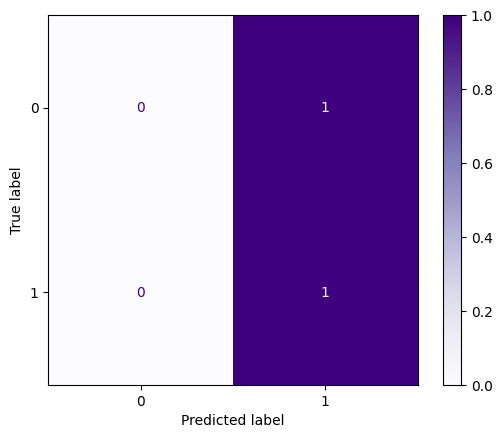

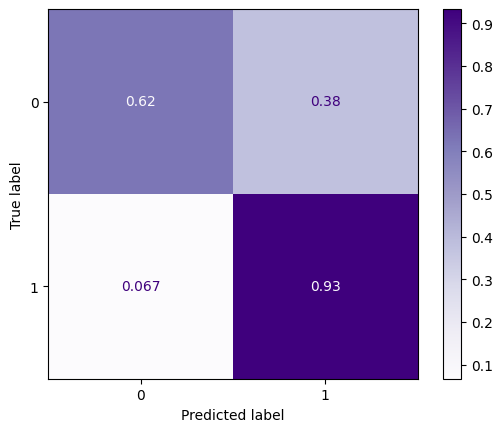

In [ ]:
## Create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_test, dum_class_test_preds, 
               normalize='true', cmap='Purples')


ConfusionMatrixDisplay.from_predictions(y_test, dec_class_test_preds, 
               normalize='true', cmap='Purples')

We see the false positives predictions (top right) and false negative predictions (bottom left) that our model made.  However, the bottom left is out of 89 total and the top right is out of 54 total.  We can see the normalized ratios of true and false predictions by normalizing along the 'true' or 'pred' axes in the ConfusionMatrixDisplay.  

To normalize along the 'true' axis, we set  normalize = 'true'`.  

Notice that it is the string 'true' NOT the boolean value: `True`

We can now see that our Decision Tree model successfully classified 94% of the samples in both classes, benign (class 0) and malignant (class 1)

Another quick way to check the accuracy, recall, and precision of a model on a test set is with `classification_report()`, which runs several metrics on both classes simultaneously.

In [ ]:
#Use classifiction_report() to print a report of several metrics for all classes at once
#for both models

## Print the classification reports
print('Train Report')
print(classification_report(y_test, dum_class_test_preds))

print('Test Report')
print(classification_report(y_test, dec_class_test_preds))

Train Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.63      1.00      0.77        90

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143

Test Report
              precision    recall  f1-score   support

           0       0.85      0.62      0.72        53
           1       0.81      0.93      0.87        90

    accuracy                           0.82       143
   macro avg       0.83      0.78      0.79       143
weighted avg       0.82      0.82      0.81       143



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


You'll notice that each class has a different recall and precision.  f1-score, by the way, is the harmonic mean of the precision and recall.  

classification_report also tells us the averages of the precisions, means, and f1-scores.  'support' is how many samples there are of each class.

# Multi-class Metrics

Precision, recall, and accuracy also extend to cases when we have more than 2 possible classes.  However, in order to know how to calculate precision and recall we have to decide which class is our positive class.  We also become interested in the most complex patterns of errors that can occur.  

For example, suppose we have a problem with 3 possible classes.  We might ask: 

When our model misclassifies class 1 samples, is it more often classifying them as class 0, or class 2?  This may help us understand why it is making that kind of mistake and how we can improve performance.

Confusion matrices and the `classification_report()` function, as with binary classification, will be your best tools for this, as they can easily show metrics for multiple classes.

Let's try this with a multiclass data: The Iris Dataset

# The Iris Dataset

In [ ]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.DataFrame(iris.target)
print(y.value_counts(normalize=True))
X.head()

0    0.333333
1    0.333333
2    0.333333
dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Train test split the iris data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Transformers
scaler = StandardScaler()

#Pipeline
num_pipe = make_pipeline(scaler)

#Selector
num_selector = make_column_selector(dtype_include='number')

#Tuple
num_tuple = (num_pipe, num_selector)

In [ ]:
# Transformers
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
freq_imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')

#Pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)

#Selector
cat_cols = make_column_selector(dtype_include='object')

#Tuple
cat_tuple = (cat_pipe, cat_cols)

In [ ]:
## Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(num_tuple,
                                       cat_tuple,
                                       remainder='drop')

In [ ]:
# fit on train
preprocessor.fit(X_train)

# Transforming train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check for missing values and that data is scaled and one-hot encoded
display(X_train_processed)

array([[ 1.79213839, -0.60238047,  1.31532306,  0.92095427],
       [ 2.14531053, -0.60238047,  1.65320421,  1.05135487],
       [-0.4446185 , -1.50797259, -0.03620155, -0.25265117],
       [ 0.26172578, -0.60238047,  0.13273902,  0.13855064],
       [-0.4446185 , -1.28157456,  0.13273902,  0.13855064],
       [ 0.49717388,  0.52960968,  1.25900953,  1.70335789],
       [-1.50413492,  0.75600771, -1.33141264, -1.1654554 ],
       [ 0.49717388, -0.8287785 ,  0.63956075,  0.79055366],
       [-1.26868682,  0.07681362, -1.21878559, -1.295856  ],
       [ 0.37944983, -0.60238047,  0.58324723,  0.79055366],
       [-0.91551468,  1.66159983, -1.04984501, -1.03505479],
       [ 0.61489792, -0.8287785 ,  0.86481486,  0.92095427],
       [-1.03323873, -2.41356471, -0.1488286 , -0.25265117],
       [-0.4446185 ,  2.56719194, -1.33141264, -1.295856  ],
       [-0.79779064,  2.34079391, -1.27509911, -1.42625661],
       [-0.09144636, -0.8287785 ,  0.0764255 ,  0.00815004],
       [ 1.55669029, -0.

# Modeling and Evaluating with Multiclass Datasets

In [ ]:
# Create a dummy classifier with the 'most_frequent' strategy and fit in on the
# iris data

idm_class = DummyClassifier(strategy='most_frequent')
idm_class_pipe = make_pipeline(preprocessor, idm_class)

# Fit model on the training data
idm_class.fit(X_train, y_train)

#Save their predictions on the train test sets
idm_class_train_preds = idm_class_pipe.predict(X_train)
idm_class_test_preds = idm_class_pipe.predict(X_test)

In [ ]:
# Evaluate the dummy classifier on the training data using 
# classification report and a confusion matrix
print('Train Report')
print(classification_report(y_train, idm_class_train_preds))

Train Report
              precision    recall  f1-score   support

           0       0.34      1.00      0.51        38
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        37

    accuracy                           0.34       112
   macro avg       0.11      0.33      0.17       112
weighted avg       0.12      0.34      0.17       112



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluate the dummy classifier on the testing data using 
# classification_report() and a confusion matrix
print('Test Report')
print(classification_report(y_test, idm_class_test_preds))

Test Report
              precision    recall  f1-score   support

           0       0.32      1.00      0.48        12
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        13

    accuracy                           0.32        38
   macro avg       0.11      0.33      0.16        38
weighted avg       0.10      0.32      0.15        38



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


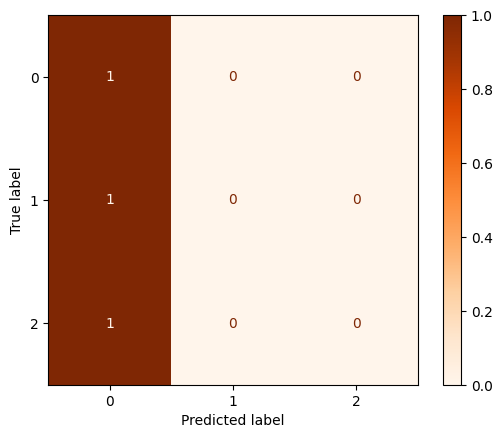

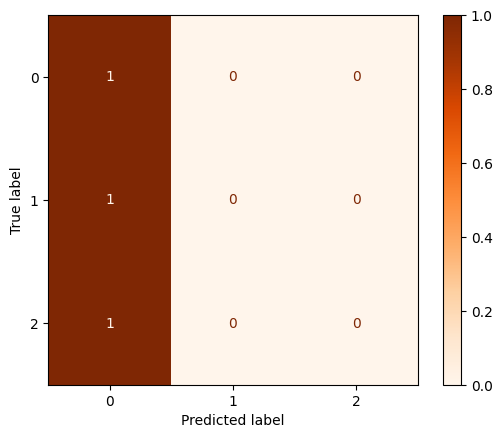

In [ ]:
## Create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, idm_class_train_preds, 
               normalize='true', cmap='Oranges')


ConfusionMatrixDisplay.from_predictions(y_test, idm_class_test_preds, 
               normalize='true', cmap='Oranges')

In [ ]:
# Create a DecisionTreeClassifier on the iris data
idec_class = DecisionTreeClassifier()
idec_class_pipe = make_pipeline(preprocessor, idec_class)

# Fit model on the training data
idec_class.fit(X_train, y_train)

#Save their predictions on the train test sets
idec_class_train_preds = idec_class_pipe.predict(X_train)
idec_class_test_preds = idec_class_pipe.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluate the decision tree on the training data using classification_report()
# and a confusion matrix
print('Train Report')
print(classification_report(y_train, idec_class_train_preds))

Train Report
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        38
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        37

    accuracy                           0.34       112
   macro avg       0.15      0.33      0.21       112
weighted avg       0.15      0.34      0.21       112



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluate the decision tree on the testing data using classification_report()
# and a confusion matrix
print('Test Report')
print(classification_report(y_test, idec_class_test_preds))

Test Report
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        12
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        13

    accuracy                           0.32        38
   macro avg       0.12      0.33      0.18        38
weighted avg       0.12      0.32      0.17        38



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


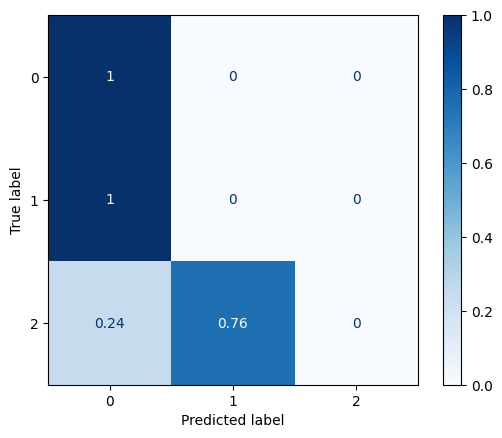

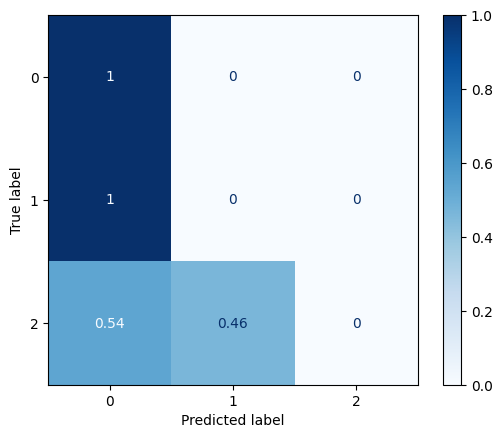

In [ ]:
## Create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, idec_class_train_preds, 
               normalize='true', cmap='Blues')


ConfusionMatrixDisplay.from_predictions(y_test, idec_class_test_preds, 
               normalize='true', cmap='Blues')

# Summary

Accuracy, precision, and recall all are metrics that give us different insights into how our model is performing in making predictions.  No one of them alone tells us everything, and different metrics are more or less important depending on our business problem.

However, we need to measure all three to make sure our model is making useful predictions.  Two ways to do this quickly are with a confusion matrix and a classification report.